In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('stock_data.csv')

In [4]:
data.head(10)

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1
5,PGNX Over 3.04,1
6,AAP - user if so then the current downtrend wi...,-1
7,Monday's relative weakness. NYX WIN TIE TAP IC...,-1
8,GOOG - ower trend line channel test & volume s...,1
9,AAP will watch tomorrow for ONG entry.,1


In [6]:
data.shape

(5791, 2)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5791 entries, 0 to 5790
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       5791 non-null   object
 1   Sentiment  5791 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 90.6+ KB


In [10]:
data.describe()

,Sentiment
count,5791.000000
mean,0.272664
std,0.962192
min,-1.000000
25%,-1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [12]:
#sentiment value count
data['Sentiment'].value_counts()

 1    3685
-1    2106
Name: Sentiment, dtype: int64

E:\Software\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sentiment', ylabel='count'>

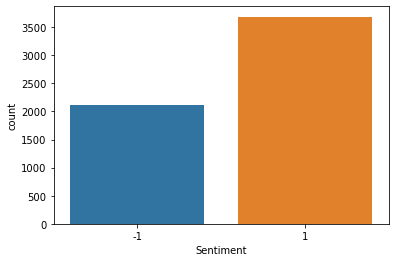

In [14]:
#plotting the sentiment value count
sns.countplot(data['Sentiment'])

<AxesSubplot:xlabel='Text', ylabel='Density'>

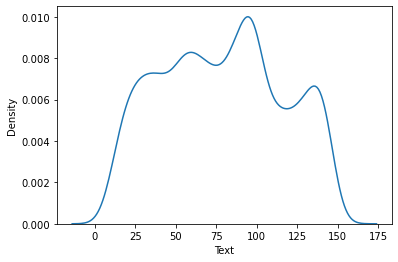

In [15]:
#loength of the text using KDEplot
length = data["Text"].str.len()
sns.kdeplot(length)

In [16]:
import nltk
import re
from nltk.stem.porter import PorterStemmer
from nltk import word_tokenize, WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Puja\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [18]:
#checking for stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('English'))
print(stop_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Puja\AppData\Roaming\nltk_data...


{'few', 'too', 'our', 'been', 'them', 'being', 'any', "you're", "it's", 'did', 'have', 'were', 'such', 'only', 'between', 'shouldn', 'itself', 'whom', "didn't", 'once', 'if', "won't", 'does', 'you', 'where', 'herself', 'because', 'ours', 'shan', 'there', 'off', "hadn't", "you'd", 'through', 'about', "shouldn't", 'hasn', 've', 'by', 'o', 'here', 'having', 'until', 'all', 'it', 'an', 'into', 'yourself', 'ma', 'then', 'the', 'this', 'doing', 'can', 'while', 'doesn', 'my', 'mustn', 'wouldn', "weren't", 'other', 'him', 'as', 'she', 'i', 's', 'himself', 'ain', 'has', "you'll", 'under', "needn't", "you've", 'will', "mightn't", 'your', 'which', 'am', 're', "wasn't", "don't", 'was', 'ourselves', 'weren', 'that', 'just', "mustn't", 'be', "that'll", 'from', 'no', 'below', 'down', 'and', 'when', 'on', 'against', 'very', 'm', 'to', 'after', 't', 'wasn', "wouldn't", 'aren', 'should', 'above', "couldn't", 'won', 'y', 'more', 'are', 'own', "haven't", 'over', 'needn', 'me', 'didn', 'isn', 'mightn', 'll

[nltk_data]   Unzipping corpora\stopwords.zip.


In [21]:
word_list = list()
for i in range(len(data)):
    lip = data.Text[i].split()
    for k in lip:
        word_list.append(k)

In [22]:
from collections import Counter
wordCounter = Counter(word_list)
countedWordDict = dict(wordCounter)
sortedWordDict = sorted(countedWordDict.items(),key = lambda x : x[1],reverse=True)
sortedWordDict[0:20]

[('the', 1796),
 ('to', 1668),
 ('a', 1280),
 ('on', 1032),
 ('of', 944),
 ('in', 891),
 ('AAP', 884),
 ('for', 868),
 ('and', 850),
 ('is', 811),
 ('-', 728),
 ('at', 541),
 ('this', 461),
 ('it', 454),
 ('I', 453),
 ('up', 357),
 ('user:', 340),
 ('from', 331),
 ('will', 330),
 ('be', 324)]

# Data Preprocesing

In [24]:
#replace the value of -1 to 0 in the output column so that the model can predict well
data['Sentiment'] = data['Sentiment'].replace(-1,0)


In [26]:
data.tail()

,Text,Sentiment
5786,Industry body CII said #discoms are likely to ...,0
5787,"#Gold prices slip below Rs 46,000 as #investor...",0
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1
5790,"#Sensex, #Nifty climb off day's highs, still u...",1


In [27]:
data['Sentiment'].value_counts()

1    3685
0    2106
Name: Sentiment, dtype: int64

In [29]:
data.shape

(5791, 2)

# NLP processing

In [34]:
ps = PorterStemmer()
lemma = WordNetLemmatizer()
stopwordSet = set(stopwords.words('english'))

In [36]:
#cleaning the text 
nltk.download('punkt')
text_reviews = list()
for i in range(len(data)):
    text = re.sub('[^a-zA-Z]', " ", data['Text'][i])
    text = text.lower()
    text = word_tokenize(text,language="english")
    text = [lemma.lemmatize(word) for word in text if(word) not in stopwordSet]
    text = " ".join(text)
    text_reviews.append(text)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Puja\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [37]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

In [38]:
## Create the (B.O.W) bag of word model
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(text_reviews).toarray()
y= data['Sentiment']

## Split the dataset into Training and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state = 0)

# Modelling and Predicting

In [39]:
## Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)

In [40]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.72      0.64      0.68       417
           1       0.81      0.86      0.84       742

    accuracy                           0.78      1159
   macro avg       0.77      0.75      0.76      1159
weighted avg       0.78      0.78      0.78      1159



In [41]:
print(confusion_matrix(y_test, Y_pred))

[[267 150]
 [102 640]]


In [42]:
## Naives baye multinomial model
clf = MultinomialNB()
clf.fit(X_train, y_train)
Y_pred = clf.predict(X_test)

In [43]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.71      0.70      0.70       417
           1       0.83      0.84      0.83       742

    accuracy                           0.79      1159
   macro avg       0.77      0.77      0.77      1159
weighted avg       0.79      0.79      0.79      1159



In [44]:
print(confusion_matrix(y_test, Y_pred))

[[291 126]
 [120 622]]


In [45]:
## Random Forest model
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)

In [46]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.69      0.72      0.71       417
           1       0.84      0.82      0.83       742

    accuracy                           0.79      1159
   macro avg       0.77      0.77      0.77      1159
weighted avg       0.79      0.79      0.79      1159



In [47]:
print(confusion_matrix(y_test, Y_pred))

[[302 115]
 [134 608]]


# conclusion

Random forest and MultinomialNB produced the predictions with the
highest accuracy, at 79%, while logistic regression scored 78%.